<h1 style="text-align: center;"><img class="responsive" style="float: left;" src="https://is1-ssl.mzstatic.com/image/thumb/Purple112/v4/b5/6e/20/b56e2053-ccd2-d63f-e0fb-a1bf3774eb0b/AppIcon-0-0-1x_U007emarketing-0-0-0-10-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/230x0w.webp" alt="" width="143" height="143" /></h1>
<h1 style="text-align: center;"><img class="responsive" style="font-size: 14px; float: right;" src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="163" height="165" /></h1>
<h1 style="text-align: center;"><span style="color: #000080; font-family: arial, helvetica, sans-serif;"><strong style="font-size: 24pt;">LCL Challenge</strong></span></h1>
<p style="text-align: center;"><span style="font-size: 14pt;">Scoring Immobilier: Syst&egrave;me Expert BEST&nbsp;IMMO</span></p>
<p style="text-align: center;"><span style="font-size: 10pt; font-family: verdana, geneva, sans-serif;">Lucie Gabagnou,&nbsp;Ghiles Idris,&nbsp;Armand L'Huillier,&nbsp;Yanis Rehoune</span></p>

Ce projet se fait dans le cadre d'un challenge proposé par Mohamed Sneiba Hamoud. Le but est de challenger le modèle de scoring existant dans l'octroi de crédit immobilier.
Les milestones de sont projets sont les suivantes: 
- Vision globale de la base de données: étude de la période + constitution des échantillons
- Preprocessing sur l'ensemble des variables (valeurs manquantes, traitement de types, etc..)
- Sélection de variables (Lasso et tests univariés avec target) + réflexion nouvelles variables
- Discrétisation des variables quantitatives + regroupement de modalités des variables qualitatives (inclut data viz stabilité)
- Modélisation classique: régression logistique + performances
- Modélisation alternative: modèle challengeant
- Grille de score



# Installation de l'environnement de travail

### Packages

In [ ]:
# import des modules
#import scipy.stats as stats

from scipy import stats
from scipy.stats import pointbiserialr
import scipy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection  import train_test_split,GridSearchCV,StratifiedKFold
import warnings 
warnings.filterwarnings("ignore")
import sklearn
import json
from sklearn.linear_model import LogisticRegression
from scripts.firststep_dataviz import min_max_for_datetime_col,missing_rate_report,stabilite_global_temps
from scripts.processing import convert_modalities_to_quali,na_sup_20_fill_by_0_vs_autres,comparer_na_variables_doublons,fill_by_0,imputation_for_na,get_dummies_var,drop_columns,proxys_processing,replace_if_not_in
from scripts.feature_selection import test_chi2_all_quali_variables, test_pointbiserial_all_quanti_variables,cramers_v_all_cat_var,selection_avec_lasso,non_significativité_chi2
from scripts.discretisation import discretisation_variables_from_chi2,verification_par_moyenne_defaut, get_binned_df
from scripts.group_cat_variables import liste_quali_a_regrouper, replace_encoding_by_real_mod, regrouper_modalites,group_modalities_with_optbinning,encoding_col_and_cat,select_quali_variables
from scripts.stability_pipeline import processing_pipeline, intervalles_semestre, intervalles_annee, stability_according_to_the_target, stability_by_repartition_of_modalities, stability_by_repartition_of_defaults

In [65]:
#Importation des données
raw_data = pd.read_excel("data/Bases_recents.xlsx")
chomage_data=pd.read_excel("data/taux_chomage.xlsx")
richesse_data=pd.read_excel("data/richesse.xlsx")
inondation_data=pd.read_excel("data/Gaspar.xlsx")

In [66]:
display(raw_data)

,region_cri,date_debloc_avec_crd,DAT_VALIDE_ACCORD_CRI,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
0,ILE DE FRANCE,201405,2010-12-01,1,0,0,40,10,2,1,...,3.140729,NaN,NaN,301510.0,1.083166,1,0,0,0,1
1,ILE DE FRANCE,201405,2011-03-14,2,0,0,10,10,2,1,...,0.999205,NaN,NaN,190962.0,0.310507,0,0,0,0,0
2,PACA,201407,2011-06-21,1,0,0,40,20,1,0,...,4.375182,NaN,NaN,105000.0,1.000000,1,0,0,0,1
3,AUVERGNE,201404,2011-06-27,1,0,0,20,20,2,1,...,2.006637,0.389825,NaN,215280.0,0.800000,0,0,0,0,0
4,ILE DE FRANCE,201404,2011-09-29,3,0,0,10,10,1,0,...,4.536824,0.287687,NaN,177700.0,0.585158,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114411,PAYS DE LA LOIRE,201804,2018-04-06,1,0,0,10,20,2,1,...,3.743370,2.582877,NaN,252670.0,1.052792,0,0,0,0,1
114412,AUVERGNE,201804,2018-03-29,2,0,0,10,10,1,0,...,3.726499,NaN,NaN,244000.0,1.000000,0,0,0,0,1
114413,ILE DE FRANCE,201804,2018-03-28,1,0,0,10,10,2,1,...,6.028812,0.697618,NaN,345680.0,1.002698,0,0,0,0,1
114414,BRETAGNE,201804,2018-03-29,1,0,0,20,20,2,1,...,3.269921,NaN,NaN,147330.0,1.091333,0,0,0,0,0


# Etude générale
- Observations de la base, partiulièrement la période étudiée
- Choix de la date de découpage Temps/ Hors-temps
- Constitution des échantillons 
- Map


#### Définition de la période d'étude
Rq: la date à considérer au cours de l'étude est la date de déblocage et non la date de validation

In [67]:
#Conversion format date
date_columns=["DAT_VALIDE_ACCORD_CRI","date_debloc_avec_crd"]
raw_data["date_debloc_avec_crd"]=pd.to_datetime(raw_data["date_debloc_avec_crd"],format="%Y%m")

In [68]:
for col in date_columns:
    min_max_for_datetime_col(raw_data,col)

Date minimale pour DAT_VALIDE_ACCORD_CRI: 2014-04-01 00:00:00
Date maximale pour DAT_VALIDE_ACCORD_CRI: 2018-04-01 00:00:00
Date minimale pour date_debloc_avec_crd: 2014-04-01 00:00:00
Date maximale pour date_debloc_avec_crd: 2018-04-01 00:00:00


#### Stabilité dans le temps?

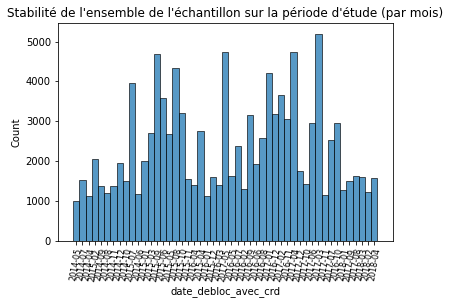

<Figure size 1008x1008 with 0 Axes>

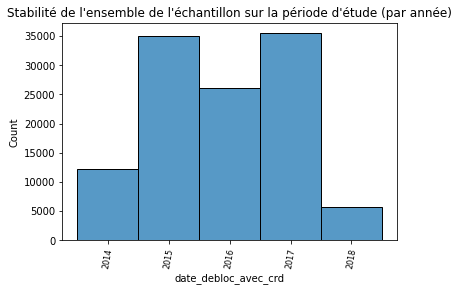

<Figure size 1008x1008 with 0 Axes>

In [69]:
stabilite_global_temps(raw_data)

Même si la base de données semble comporter des valeurs "extrêmes" (au delà de 3000 observations), il n'y a pas une distribution asymétrique entre les années (les données se comportent de la même façon au sein d'une année). On peut donc envisager un découpage hors-temps classique. Par année, le nombre d'observations peut  être différent mais cela peut être largement expliqué par le fait que les années ne sont pas complètes (pour 2014 et 2018).

In [70]:
# Vérification des moyennes sur les potentielles base temps or temps 
print('base OOT :' , raw_data[raw_data["date_debloc_avec_crd"]>"2017-04-01"].mean()['defaut_36mois'] )
print('base principale :', raw_data[(raw_data["date_debloc_avec_crd"]<="2017-04-01") & (raw_data["date_debloc_avec_crd"]>= "2014-04-01"  ) ].mean()['defaut_36mois'] )



base OOT : 0.009738727530138573
base principale : 0.0063661409112362385


Les gens qui ont octroyé un prêt après 04/2017 ont eu plus de défaut sur cette période. On aura sûrement moins de facilité à trouver le défaut sachant que la base OOT a plus d'observations en moyenne comportant des défauts.
Remarque: une explication plausible du taux de défaut plus élevé pourraît être la crise de covid. En effet, les clients considérés à partir d'avril 2017 ont été observés jusqu'en avril 2021 (au max). Cela signifie, contrairement aux autres clients, qu'ils ont connu la crise du covid et la récession qui s'en suit. Peut-être, peut-on considérer base hors temps comme un choc inhabituel? 

#### Découpage de la base

- Découpage temps/hors temps (df_etude, df_hors_temps)
- Découpage base temps: échantillon d'apprentissage et de test (X_train, X_test)

##### Découpage temps/hors-temps

In [71]:
#DECOUPAGE TEMPS/HORS TEMPS
df_hors_temps=raw_data[raw_data["date_debloc_avec_crd"]>="2017-04-01"]
df_etude=raw_data[(raw_data["date_debloc_avec_crd"]<"2017-04-01") & (raw_data["date_debloc_avec_crd"]> "2014-04-01"  ) ]
print("Effectif base temps:", len(df_etude), " VS  Effectif base hors temps:",len(df_hors_temps) )
# Le découpage semble être plutôt approprié

Effectif base temps: 85270  VS  Effectif base hors temps: 28037


##### Découpage Apprentissage/Test
Remarque: on utilise l'option stratify lors de la constitution des échantillons Train et Test de sorte à avoir un taux de défaut représentatif de l'ensemble de l'échantillon

In [72]:

X_train, X_test=train_test_split(df_etude,test_size=0.2 , stratify =df_etude['defaut_36mois'] )
# Vérification que le taux de défaut sur l'échantillon d'apprentissage et validation
print("TAUX DE DEFAUT POUR LES DEUX ECHANTILLONS:")
print( 'train :' , X_train['defaut_36mois'].mean() * 100, " vs ",'test : ' , X_test['defaut_36mois'].mean()*100)
y=X_train["defaut_36mois"].astype(int)
drop_columns(X_train,["defaut_36mois"])


TAUX DE DEFAUT POUR LES DEUX ECHANTILLONS:
train : 0.6435440365896563  vs  test :  0.6450099683358743
Ces colonnes vont être retirées: ['defaut_36mois']


,region_cri,date_debloc_avec_crd,DAT_VALIDE_ACCORD_CRI,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
3164,ILE DE FRANCE,2014-09-01,2014-06-04,1,0,0,10,20,2,1,...,4.348690,0.372745,NaN,350000.0,0.990491,0,0,0,0,0
26518,ILE DE FRANCE,2015-06-01,2015-04-03,1,0,0,10,20,2,1,...,4.518521,NaN,NaN,186633.0,1.012110,0,0,0,0,1
11339,GRAND EST,2014-12-01,2014-11-08,1,0,0,10,20,2,1,...,3.712432,0.359417,NaN,216910.0,1.050854,0,0,0,0,0
67593,ILE DE FRANCE,2016-09-01,2016-08-09,1,0,0,10,20,1,0,...,1.548325,0.019761,NaN,81798.0,1.029255,0,0,0,0,1
40361,ILE DE FRANCE,2015-07-01,2015-06-18,1,0,0,10,10,1,0,...,3.302014,1.170714,NaN,220000.0,0.763094,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,BOURGOGNE,2015-07-01,2015-06-05,1,0,0,10,20,2,1,...,3.145897,NaN,NaN,159541.0,1.046644,0,0,0,0,0
53184,ILE DE FRANCE,2016-03-01,2016-02-19,1,0,0,10,10,1,0,...,2.602667,0.151763,NaN,69473.0,1.036106,0,0,0,0,1
39125,PACA,2015-09-01,2015-06-24,1,0,0,10,20,2,1,...,3.772421,1.367970,NaN,90689.0,1.031248,0,0,0,0,0
77287,ILE DE FRANCE,2017-02-01,2016-12-03,1,0,0,40,10,1,0,...,2.768274,NaN,0.034912,78356.0,1.023191,1,0,0,0,0


L'échantillon test comporte pour l'instant 20% des observations et l'échantillon d'apprentissage 80%. Par ailleurs, on remarque le taux de défaut est quasiment égal (au millième près). La stratification de l'échantillon a été efficace. 

#### Map

# Preprocessing global
- Suppression des colonnes inutiles (indiquées par le métier ou considérées comme inutiles à la suite de l'analyse)
- Traitement des types 
- Valeurs manquantes



####

### Suppression de variables a priori
- TOP_GARANTIE_CL (indiqué sur la description des variables)
- ID n'est pas utilisable


In [73]:
colonnes_drop=['TOP_GARANTIE_CL',"ID"]
X_train.drop(columns= colonnes_drop, inplace = True)

### Traitement des types 

#### Variables de temps:
- On les supprime de l'analyse car ne sont pas forcément pertinente (ça aurait été le cas si on connaissait la date de tombée en défaut..)
- On garde date_for_viz pour stabilité temporelle

In [74]:
date_for_viz=X_train["date_debloc_avec_crd"]
X_train.drop(columns=date_columns,inplace=True)

#### Variables catégorielles

- On convertit les dummies en qualitatives
- On récupère la liste des variables catégorielles (présentes dans le lexique + celles qui sont géographiques..)
- On remarque que certaines variables sont en double, on regardera si certaines ont plus de NA que d'autres par la suite
- Les modalités sont souvent notées 1, 2, 3, etc... ==> Elles vont être lues comme numériques donc il faut les transformer en str (object)

In [75]:
# Il faut peut-être mettre dummies dans variables qualitatives?
list_dummies=get_dummies_var(X_train)
print("Variables dummies: ",list_dummies)
convert_modalities_to_quali(X_train,list_dummies)

Variables dummies:  ['TOP_CONNU_BRP', 'TOP_SCI_BRP', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'ROL_INT_MAX_BRP', 'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_BIEN_FR_CRI', 'TOP_NAT_FR_CRI', 'top_locatif', 'top_pret_int_ext', 'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule']


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
3164,ILE DE FRANCE,1,0,0,10,20,2,1,95100,FRA,...,4.348690,0.372745,NaN,350000.0,0.990491,0,0,0,0,0
26518,ILE DE FRANCE,1,0,0,10,20,2,1,91590,FRA,...,4.518521,NaN,NaN,186633.0,1.012110,0,0,0,0,1
11339,GRAND EST,1,0,0,10,20,2,1,57290,FRA,...,3.712432,0.359417,NaN,216910.0,1.050854,0,0,0,0,0
67593,ILE DE FRANCE,1,0,0,10,20,1,0,78120,FRA,...,1.548325,0.019761,NaN,81798.0,1.029255,0,0,0,0,1
40361,ILE DE FRANCE,1,0,0,10,10,1,0,92300,FRA,...,3.302014,1.170714,NaN,220000.0,0.763094,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,BOURGOGNE,1,0,0,10,20,2,1,89240,FRA,...,3.145897,NaN,NaN,159541.0,1.046644,0,0,0,0,0
53184,ILE DE FRANCE,1,0,0,10,10,1,0,94430,FRA,...,2.602667,0.151763,NaN,69473.0,1.036106,0,0,0,0,1
39125,PACA,1,0,0,10,20,2,1,04700,FRA,...,3.772421,1.367970,NaN,90689.0,1.031248,0,0,0,0,0
77287,ILE DE FRANCE,1,0,0,40,10,1,0,93160,FRA,...,2.768274,NaN,0.034912,78356.0,1.023191,1,0,0,0,0


In [76]:
# On récupère toutes les qualis et on les convertit si elles sont numériques encore (convert_modalities_to_quali)
modalities_var=["TYP_CNT_TRA_MAX_BRP",
                "CODTYPE_PROJET_CRI",
                "COD_ETA_BIEN_CRI",
                "COD_USAGE_BIEN_CRI",
                "STA_CLP_BRP",
                "TYP_LOG_ACT_BRP",
                "QUA_INT_MAX_BRP",
                "ROL_INT_MAX_BRP",
                "CODTYP_CRT_TRAVAIL_CRI",
                "COD_SITU_LOGT_CRI",
                "COD_SIT_FAM_EMPRUNTEUR_CRI",
                "COD_TYPE_MARCHE_CRI",
                "NAT_BIEN_FIN_BRP",
                "SIT_FAM_INT_BRP",
                "COD_CPPOP_CRI", 
                "COD_CSP_BRP",
                "CSP_RGP_BRP",
                "ASU_BIEN_FIN_BRP",
                "CODTYPE_PROJET_CRI",
                "QUA_INT_1_BRP",
                "CODPAY_NAT_EMPRUNTEUR_CRI",
                "DEPARTEMENT_CRI",
                "COD_POSTAL_BIEN_CRI",
                "IRPAR_USAGE_V12_MAX",
                "IRPRO_USAGE_V12_MAX",
                "NBR_INT_BRP",
                "NBR_TOT_COEMPR_CRI",
                "NBR_ENF_ACHARGE_CRI",
                "NBR_OCCUP_CRI",

                ]  
                



convert_modalities_to_quali(X_train, modalities_var)


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
3164,ILE DE FRANCE,1,0,0,10,20,2,1,95100,FRA,...,4.348690,0.372745,NaN,350000.0,0.990491,0,0,0,0,0
26518,ILE DE FRANCE,1,0,0,10,20,2,1,91590,FRA,...,4.518521,NaN,NaN,186633.0,1.012110,0,0,0,0,1
11339,GRAND EST,1,0,0,10,20,2,1,57290,FRA,...,3.712432,0.359417,NaN,216910.0,1.050854,0,0,0,0,0
67593,ILE DE FRANCE,1,0,0,10,20,1,0,78120,FRA,...,1.548325,0.019761,NaN,81798.0,1.029255,0,0,0,0,1
40361,ILE DE FRANCE,1,0,0,10,10,1,0,92300,FRA,...,3.302014,1.170714,NaN,220000.0,0.763094,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,BOURGOGNE,1,0,0,10,20,2,1,89240,FRA,...,3.145897,NaN,NaN,159541.0,1.046644,0,0,0,0,0
53184,ILE DE FRANCE,1,0,0,10,10,1,0,94430,FRA,...,2.602667,0.151763,NaN,69473.0,1.036106,0,0,0,0,1
39125,PACA,1,0,0,10,20,2,1,04700,FRA,...,3.772421,1.367970,NaN,90689.0,1.031248,0,0,0,0,0
77287,ILE DE FRANCE,1,0,0,40,10,1,0,93160,FRA,...,2.768274,NaN,0.034912,78356.0,1.023191,1,0,0,0,0


### Valeurs manquantes

Ici, on a distingué trois types de valeurs manquantes: 
- si taux > 90% on vire ces variables
- si taux entre 20 % et 90 %, on a plusieurs possibilités:
    +  si SUM = NA correspond à une valeur nulle 
    +  sinon on fait la même chose pour les variables quali et quanti que pour les na faibles

In [77]:
df_missing_rate=missing_rate_report(X_train)

,count,rate
FINANCEMENT_PR_BRP,67145,98.429987
SUM_MNT_PRE_INTERNE_BRP,66378,97.305617
TX_FINANCEMENT_AGENCE_BRP,66225,97.081330
TX_APPORT_AGENCE_BRP,66225,97.081330
TX_FINANCEMENT_BRP,66196,97.038818
...,...,...
COUT_PROJET_HF_AT_BRP,0,0.000000
MNT_COUT_TOT_CREDIT_CRI,0,0.000000
PCT_TEG_TAEG_CRI,0,0.000000
PCT_NEGOC_CRI,0,0.000000


#### NA > 90%

In [78]:
#On enleve les variables comportant trop de na cad supérieur à 90%
high_na=df_missing_rate.index[df_missing_rate["rate"]> 90 ].tolist()
print("TRAITEMENT VALEURS MANQUANTES > 90%")
drop_columns(X_train,high_na)

TRAITEMENT VALEURS MANQUANTES > 90%
Ces colonnes vont être retirées: ['FINANCEMENT_PR_BRP', 'SUM_MNT_PRE_INTERNE_BRP', 'TX_FINANCEMENT_AGENCE_BRP', 'TX_APPORT_AGENCE_BRP', 'TX_FINANCEMENT_BRP', 'TX_APPORT_BRP', 'mnt_pret_ext_brp', 'SUM_LOYER_BRP', 'SUM_AUTRES_CHARG_BRP']


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
3164,ILE DE FRANCE,1,0,0,10,20,2,1,95100,FRA,...,4.348690,0.372745,NaN,350000.0,0.990491,0,0,0,0,0
26518,ILE DE FRANCE,1,0,0,10,20,2,1,91590,FRA,...,4.518521,NaN,NaN,186633.0,1.012110,0,0,0,0,1
11339,GRAND EST,1,0,0,10,20,2,1,57290,FRA,...,3.712432,0.359417,NaN,216910.0,1.050854,0,0,0,0,0
67593,ILE DE FRANCE,1,0,0,10,20,1,0,78120,FRA,...,1.548325,0.019761,NaN,81798.0,1.029255,0,0,0,0,1
40361,ILE DE FRANCE,1,0,0,10,10,1,0,92300,FRA,...,3.302014,1.170714,NaN,220000.0,0.763094,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,BOURGOGNE,1,0,0,10,20,2,1,89240,FRA,...,3.145897,NaN,NaN,159541.0,1.046644,0,0,0,0,0
53184,ILE DE FRANCE,1,0,0,10,10,1,0,94430,FRA,...,2.602667,0.151763,NaN,69473.0,1.036106,0,0,0,0,1
39125,PACA,1,0,0,10,20,2,1,04700,FRA,...,3.772421,1.367970,NaN,90689.0,1.031248,0,0,0,0,0
77287,ILE DE FRANCE,1,0,0,40,10,1,0,93160,FRA,...,2.768274,NaN,0.034912,78356.0,1.023191,1,0,0,0,0


#### NA < 90% 

On a fait plusieurs constats: 
- On a des variables catégorielles en double: intéressant de voir si une comporte plus de na que son doublon   / Démarche à faire pour quanti si il y a 
- SUM => Il semblerait que ces variables contiennent des na si c'est = 0 (épargne non renseignée = n'a pas d'épargne)
#

On propose une fonction qui :
- pour SUM => fill par 0
- pour variables catégorielles = imputation par mode
- pour variables quantitatives = imputation par médiane 

##### Traitement variables catégorielles en double et NaN

In [79]:

#On remarque directement dans le lexique qu'il y a des variables en double. Si l'une des variables en doublons est plus complète qu'une autre, on a interêt à la garder 

dict_doublons={"NAT_BIEN_FIN_BRP" : "CODTYPE_PROJET_CRI",
                        "ASU_BIEN_FIN_BRP" : "COD_USAGE_BIEN_CRI",
                        "TYP_CNT_TRA_MAX_BRP" : "CODTYP_CRT_TRAVAIL_CRI",
                        "SIT_FAM_INT_BRP" : "COD_SIT_FAM_EMPRUNTEUR_CRI",
                        "TYP_LOG_ACT_BRP" : "COD_SITU_LOGT_CRI"
                        }
     
colonnes_doublons_to_drop=comparer_na_variables_doublons(X_train,dict_doublons)
drop_columns(X_train,colonnes_doublons_to_drop)


COMPARAISON NA POUR COLONNES EN DOUBLE
NAT_BIEN_FIN_BRP  VS  CODTYPE_PROJET_CRI
0  VS  0
ASU_BIEN_FIN_BRP  VS  COD_USAGE_BIEN_CRI
0  VS  0
TYP_CNT_TRA_MAX_BRP  VS  CODTYP_CRT_TRAVAIL_CRI
571  VS  571
SIT_FAM_INT_BRP  VS  COD_SIT_FAM_EMPRUNTEUR_CRI
0  VS  0
TYP_LOG_ACT_BRP  VS  COD_SITU_LOGT_CRI
0  VS  0
DONE
Ces colonnes vont être retirées: ['NAT_BIEN_FIN_BRP', 'ASU_BIEN_FIN_BRP', 'TYP_CNT_TRA_MAX_BRP', 'SIT_FAM_INT_BRP', 'TYP_LOG_ACT_BRP']


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
3164,ILE DE FRANCE,1,0,0,2,1,95100,FRA,20,10,...,4.348690,0.372745,NaN,350000.0,0.990491,0,0,0,0,0
26518,ILE DE FRANCE,1,0,0,2,1,91590,FRA,20,70,...,4.518521,NaN,NaN,186633.0,1.012110,0,0,0,0,1
11339,GRAND EST,1,0,0,2,1,57290,FRA,20,70,...,3.712432,0.359417,NaN,216910.0,1.050854,0,0,0,0,0
67593,ILE DE FRANCE,1,0,0,1,0,78120,FRA,20,130,...,1.548325,0.019761,NaN,81798.0,1.029255,0,0,0,0,1
40361,ILE DE FRANCE,1,0,0,1,0,92300,FRA,10,10,...,3.302014,1.170714,NaN,220000.0,0.763094,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,BOURGOGNE,1,0,0,2,1,89240,FRA,20,70,...,3.145897,NaN,NaN,159541.0,1.046644,0,0,0,0,0
53184,ILE DE FRANCE,1,0,0,1,0,94430,FRA,10,70,...,2.602667,0.151763,NaN,69473.0,1.036106,0,0,0,0,1
39125,PACA,1,0,0,2,1,04700,FRA,20,130,...,3.772421,1.367970,NaN,90689.0,1.031248,0,0,0,0,0
77287,ILE DE FRANCE,1,0,0,1,0,93160,FRA,10,130,...,2.768274,NaN,0.034912,78356.0,1.023191,1,0,0,0,0


#### NA > 20%

In [80]:
#On traite les na qui doivent avoir un traitement particulier cad qu'elles comportent bcp de na mais ne doivent pas être supprimé
# Remarque: On garde les variables de coût pour la suite
df_missing_rate=missing_rate_report(X_train)
missing_rate_sup_20=df_missing_rate.index[df_missing_rate["rate"]>20 ].tolist()
print("TRAITEMENT POUR VALEURS MANQUANTES >20%: ", missing_rate_sup_20)
variables_a_fill_0, variables_na_to_drop = na_sup_20_fill_by_0_vs_autres(missing_rate_sup_20)
variables_a_fill_0.append("COUT_NOTAIRE_BRP")
variables_a_fill_0.append("COUT_ACQ_BRP")
variables_na_to_drop.remove("COUT_NOTAIRE_BRP")
variables_na_to_drop.remove("COUT_ACQ_BRP")
print("Variables non supprimées: ",variables_a_fill_0)
fill_by_0(X_train, variables_a_fill_0)
drop_columns(X_train,variables_na_to_drop)


,count,rate
rentabilite_loc,56795,83.257594
SUM_RESS_IMMO_BRP,56697,83.113932
COUT_NOTAIRE_BRP,39062,57.262226
COUT_ACQ_BRP,38291,56.131992
SUM_PATR_IMMO_BRP,35388,51.876393
...,...,...
MNT_COUT_TOT_CREDIT_CRI,0,0.000000
PCT_TEG_TAEG_CRI,0,0.000000
PCT_NEGOC_CRI,0,0.000000
MNT_PRET_CRI,0,0.000000


TRAITEMENT POUR VALEURS MANQUANTES >20%:  ['rentabilite_loc', 'SUM_RESS_IMMO_BRP', 'COUT_NOTAIRE_BRP', 'COUT_ACQ_BRP', 'SUM_PATR_IMMO_BRP', 'SUM_MTENCBIE_IMMO_BRP', 'SUM_MNT_PRE_EXTERNE_BRP', 'Epargne_nb_ans_rev_prof', 'SUM_EPARGNE_BRP', 'SUM_MTENCBIE_EPARGNE_BRP', 'SUM_TAX_FISC_BRP']
Variables non supprimées:  ['SUM_RESS_IMMO_BRP', 'SUM_PATR_IMMO_BRP', 'SUM_MTENCBIE_IMMO_BRP', 'SUM_MNT_PRE_EXTERNE_BRP', 'SUM_EPARGNE_BRP', 'SUM_MTENCBIE_EPARGNE_BRP', 'SUM_TAX_FISC_BRP', 'COUT_NOTAIRE_BRP', 'COUT_ACQ_BRP']
IMPUTATION PAR 0
OK
Ces colonnes vont être retirées: ['rentabilite_loc', 'Epargne_nb_ans_rev_prof']


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,...,TOP_NAT_FR_CRI,CSP_RGP_BRP,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
3164,ILE DE FRANCE,1,0,0,2,1,95100,FRA,20,10,...,1,3.0,4.348690,350000.0,0.990491,0,0,0,0,0
26518,ILE DE FRANCE,1,0,0,2,1,91590,FRA,20,70,...,1,5.0,4.518521,186633.0,1.012110,0,0,0,0,1
11339,GRAND EST,1,0,0,2,1,57290,FRA,20,70,...,1,4.0,3.712432,216910.0,1.050854,0,0,0,0,0
67593,ILE DE FRANCE,1,0,0,1,0,78120,FRA,20,130,...,1,3.0,1.548325,81798.0,1.029255,0,0,0,0,1
40361,ILE DE FRANCE,1,0,0,1,0,92300,FRA,10,10,...,1,3.0,3.302014,220000.0,0.763094,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,BOURGOGNE,1,0,0,2,1,89240,FRA,20,70,...,1,6.0,3.145897,159541.0,1.046644,0,0,0,0,0
53184,ILE DE FRANCE,1,0,0,1,0,94430,FRA,10,70,...,1,5.0,2.602667,69473.0,1.036106,0,0,0,0,1
39125,PACA,1,0,0,2,1,04700,FRA,20,130,...,1,4.0,3.772421,90689.0,1.031248,0,0,0,0,0
77287,ILE DE FRANCE,1,0,0,1,0,93160,FRA,10,130,...,1,3.0,2.768274,78356.0,1.023191,1,0,0,0,0


#### NA faible (<20%)

In [81]:
imputation_for_na(X_train)


IMPUTATION PAR MODE OU MEDIANE
OK


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,...,TOP_NAT_FR_CRI,CSP_RGP_BRP,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
3164,ILE DE FRANCE,1,0,0,2,1,95100,FRA,20,10,...,1,3.0,4.348690,350000.0,0.990491,0,0,0,0,0
26518,ILE DE FRANCE,1,0,0,2,1,91590,FRA,20,70,...,1,5.0,4.518521,186633.0,1.012110,0,0,0,0,1
11339,GRAND EST,1,0,0,2,1,57290,FRA,20,70,...,1,4.0,3.712432,216910.0,1.050854,0,0,0,0,0
67593,ILE DE FRANCE,1,0,0,1,0,78120,FRA,20,130,...,1,3.0,1.548325,81798.0,1.029255,0,0,0,0,1
40361,ILE DE FRANCE,1,0,0,1,0,92300,FRA,10,10,...,1,3.0,3.302014,220000.0,0.763094,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,BOURGOGNE,1,0,0,2,1,89240,FRA,20,70,...,1,6.0,3.145897,159541.0,1.046644,0,0,0,0,0
53184,ILE DE FRANCE,1,0,0,1,0,94430,FRA,10,70,...,1,5.0,2.602667,69473.0,1.036106,0,0,0,0,1
39125,PACA,1,0,0,2,1,04700,FRA,20,130,...,1,4.0,3.772421,90689.0,1.031248,0,0,0,0,0
77287,ILE DE FRANCE,1,0,0,1,0,93160,FRA,10,130,...,1,3.0,2.768274,78356.0,1.023191,1,0,0,0,0


In [82]:
verif_valeurs_manquantes = X_train.isna().sum().sort_values()
print("Nombre de NaN:",verif_valeurs_manquantes)
print("TRAITEMENT DES VALEURS MANQUANTES: OK ")


Nombre de NaN: region_cri                    0
IND_PRIMO_ACCEDT_CRI          0
IND_INCIDENT_BDF_CRI          0
COD_TYPE_MARCHE_CRI           0
COD_SIT_FAM_EMPRUNTEUR_CRI    0
                             ..
MNT_PRET_CRI                  0
NBR_DUREE_TOT_PRET_CRI        0
top_exist_conso_revo_BRP      0
COUT_NOTAIRE_BRP              0
top_pers_seule                0
Length: 102, dtype: int64
TRAITEMENT DES VALEURS MANQUANTES: OK 


# Sélection de variables: Régression Lasso VS étude univariée


#### Variables considérées comme utiles mais qui ne seront pas significatives: proxys
Les variables comme le code postal, la région, etc.. ne doivent pas être utilisé lors de cette sélection


In [83]:
display(chomage_data)
#richesse.drop(columns="Unnamed: 0",inplace=True)
display(richesse_data)

display(inondation_data)

,Code,MOYENNE
0,01,8.700
1,02,6.970
2,03,13.370
3,04,10.060
4,05,10.960
...,...,...
92,92,7.420
93,93,7.410
94,94,12.485
95,95,8.620


,Unnamed: 0,Loyer moyen par mètre carré de surface habitable (en €),Taux de logements sociaux
0,01,5.9000,7.1600
1,02,5.3300,7.7900
2,03,5.2200,6.0900
3,04,5.8700,4.5500
4,05,5.3200,5.6900
...,...,...,...
92,92,7.1700,12.4700
93,93,6.7800,14.0800
94,94,6.9400,12.6500
95,95,6.5800,10.1200


,Commune,Somme de nb_com_ddrm
0,01001,1
1,01002,0
2,01004,1
3,01005,0
4,01006,0
...,...,...
34959,97612,1
34960,97613,1
34961,97614,1
34962,97615,1


On a deux types de jeu de données: 
- Un basé sur les codes postaux des communes
- L'autre sur les départements

On dispose des deux colonnes dans le dataframe de base, ce qui va nous permettre de réaliser facilement un merge:
- DEPARTEMENT_CRI

In [84]:

proxys_processing(X_train,richesse_data,chomage_data,inondation_data)

In [85]:
#Drop colonnes géo et nationalité pour l'instant = on les réintroduira dans l'analyse pour variables auxiliaires
list_geo_features=["region_cri","COD_POSTAL_BIEN_CRI","DEPARTEMENT_CRI","NAT_INT_MAX_BRP","CODPAY_NAT_EMPRUNTEUR_CRI","CODPAY_BIEN_CRI"]
drop_columns(X_train,list_geo_features)

Ces colonnes vont être retirées: ['region_cri', 'COD_POSTAL_BIEN_CRI', 'DEPARTEMENT_CRI', 'NAT_INT_MAX_BRP', 'CODPAY_NAT_EMPRUNTEUR_CRI', 'CODPAY_BIEN_CRI']


,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,...,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule,TAUX_HLM,TAUX_CHOMAGE,PRIX_LOYER
3164,1,0,0,2,1,20,10,60,10,3360.0,...,350000.0,0.990491,0,0,0,0,0,10.12,9.02,6.58
26518,1,0,0,2,1,20,70,60,10,21367.0,...,186633.0,1.012110,0,0,0,0,1,9.69,9.02,6.59
11339,1,0,0,2,1,20,70,50,10,18090.0,...,216910.0,1.050854,0,0,0,0,0,7.56,9.02,5.53
67593,1,0,0,1,0,20,130,60,10,168202.0,...,81798.0,1.029255,0,0,0,0,1,8.91,9.02,6.72
40361,1,0,0,1,0,10,10,60,10,68300.0,...,220000.0,0.763094,0,0,0,0,1,12.47,9.02,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,1,0,0,2,1,20,70,60,10,11459.0,...,159541.0,1.046644,0,0,0,0,0,6.28,9.02,5.26
53184,1,0,0,1,0,10,70,60,10,124515.0,...,69473.0,1.036106,0,0,0,0,1,12.65,9.02,6.94
39125,1,0,0,2,1,20,130,50,10,106804.0,...,90689.0,1.031248,0,0,0,0,0,4.55,10.06,5.87
77287,1,0,0,1,0,10,130,40,40,81644.0,...,78356.0,1.023191,1,0,0,0,0,14.08,9.02,6.78


In [86]:
proxys_var=["PRIX_LOYER","TAUX_CHOMAGE","TAUX_HLM"]

### Etude univariée

#### Variables quantitatives: Point Biserial


In [87]:
#Since the p-value of this correlation is not less than .05, this correlation is not statistically significant. 
print("si la pvalue<0.05  alors la variable associée est significative au seuil de 5%")
df_point_bis=test_pointbiserial_all_quanti_variables(X_train,y)
quanti_non_significatives = df_point_bis["variable"][df_point_bis["pvalue"]<0.05].tolist()
display(df_point_bis[df_point_bis['pvalue'] <= 0.05])


si la pvalue<0.05  alors la variable associée est significative au seuil de 5%


,variable,corr,pvalue
1,BEST_APPORT_MT_BRP,-0.014,0.000
2,BEST_APPORT_TX_BRP,-0.027,0.000
5,TX_APPORT_HF_AT_BRP,-0.008,0.046
6,TX_APPORT_HF_HT_BRP,-0.023,0.000
8,TX_APPORT_TF_HT_BRP,-0.018,0.000
9,FINANCEMENT_LT_BRP,0.010,0.006
10,TX_APPORT_SE_BRP,-0.030,0.000
11,LTV_OCTROI_BRP,0.027,0.000
12,LTV_ACPR_BRP,0.030,0.000
13,NBR_DUREE_TOT_PRET_CRI,0.023,0.000


#### Variables qualitatives: Chi2


In [88]:
print("si la pvalue<0.05  alors la variable associée est significative au seuil de 5%")
df_chi2=test_chi2_all_quali_variables(X_train,y)
quali_non_significatives=df_chi2["variable"][df_chi2["pvalue"]<0.05].tolist()
display(df_chi2[df_chi2['pvalue'] <= 0.05].sort_values(by="Chi2",ascending=False))

display(cramers_v_all_cat_var(X_train).style.highlight_between(left=60/100,right=98/100))

si la pvalue<0.05  alors la variable associée est significative au seuil de 5%


,variable,Chi2,pvalue
12,IRPAR_USAGE_V12_MAX,257.633200,0.000
5,COD_CPPOP_CRI,139.500566,0.000
21,COD_SITU_LOGT_CRI,97.556332,0.000
14,COD_CSP_BRP,87.823275,0.002
13,IRPRO_USAGE_V12_MAX,73.953015,0.000
20,CODTYP_CRT_TRAVAIL_CRI,55.562007,0.000
6,COD_ETA_BIEN_CRI,40.418290,0.000
25,IND_PRIMO_ACCEDT_CRI,38.159392,0.000
27,NBR_OCCUP_CRI,28.587408,0.007
8,TOP_ETR_BRP,23.759607,0.000


,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,TOP_ETR_BRP,TOP_PRET_RELAIS_BRP,TOP_SURFINANCEMENT_BRP,top_exist_conso_revo_BRP,IRPAR_USAGE_V12_MAX,IRPRO_USAGE_V12_MAX,COD_CSP_BRP,STA_CLP_BRP,TOP_ASC_DESC_BRP,QUA_INT_1_BRP,QUA_INT_MAX_BRP,ROL_INT_MAX_BRP,CODTYP_CRT_TRAVAIL_CRI,COD_SITU_LOGT_CRI,COD_SIT_FAM_EMPRUNTEUR_CRI,COD_TYPE_MARCHE_CRI,IND_INCIDENT_BDF_CRI,IND_PRIMO_ACCEDT_CRI,NBR_ENF_ACHARGE_CRI,NBR_OCCUP_CRI,TOP_BIEN_FR_CRI,TOP_NAT_FR_CRI,CSP_RGP_BRP,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
TOP_CONNU_BRP,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TOP_SCI_BRP,nan,0.999117,0.743092,0.126616,0.295550,0.067840,0.039892,0.269853,0.020126,0.005939,0.000000,0.049551,0.159957,0.618592,0.999619,0.999978,0.000000,0.999985,0.999985,0.042070,0.052531,0.999949,0.999963,0.999111,0.000000,0.040735,0.108242,0.633804,0.000000,0.015483,0.999949,0.166608,0.016839,0.010129,0.010129,0.120668
NBR_INT_BRP,nan,0.743092,1.000000,0.544402,0.163780,0.075792,0.048003,0.083005,0.072109,0.032348,0.052774,0.161977,0.060601,0.210524,0.335070,0.371556,0.203065,0.494508,0.452862,0.324152,0.030946,0.347118,0.465975,0.524976,0.000000,0.078351,0.201436,0.376938,0.000000,0.016170,0.334212,0.132355,0.013444,0.012133,0.012133,0.726009
NBR_TOT_COEMPR_CRI,nan,0.126616,0.544402,1.000000,0.163389,0.080642,0.052345,0.041380,0.078311,0.032138,0.056052,0.167274,0.029823,0.049315,0.082408,0.063486,0.601907,0.260821,0.164462,0.334945,0.032460,0.130072,0.365864,0.089553,0.000000,0.070309,0.228184,0.356138,0.000000,0.029367,0.078654,0.075835,0.000000,0.009359,0.009359,0.726285
CODTYPE_PROJET_CRI,nan,0.295550,0.163780,0.163389,1.000000,0.116699,0.117526,0.419915,0.056168,0.021880,0.090176,0.132861,0.035455,0.078641,0.120995,0.148232,0.010757,0.196363,0.184355,0.107461,0.022120,0.131303,0.164261,0.210976,0.000000,0.103602,0.103908,0.132039,0.040161,0.047772,0.128147,0.398446,0.046882,0.028478,0.028478,0.263562
COD_CPPOP_CRI,nan,0.067840,0.075792,0.080642,0.116699,1.000000,0.352715,0.079865,0.097953,0.127082,0.246305,0.171018,0.063706,0.019652,0.056095,0.044140,0.020705,0.072706,0.062663,0.044158,0.031370,0.230851,0.115139,0.057692,0.007827,0.322723,0.084321,0.074638,0.000000,0.083820,0.052693,0.158838,0.190550,0.189244,0.189244,0.190314
COD_ETA_BIEN_CRI,nan,0.039892,0.048003,0.052345,0.117526,0.352715,1.000000,0.186961,0.052110,0.040181,0.263722,0.071669,0.034123,0.010354,0.046075,0.020888,0.005136,0.055231,0.041825,0.025272,0.015833,0.089454,0.051185,0.048405,0.000000,0.180255,0.041878,0.042836,0.000000,0.043885,0.043974,0.400793,0.076676,0.097671,0.097671,0.105862
COD_USAGE_BIEN_CRI,nan,0.269853,0.083005,0.041380,0.419915,0.079865,0.186961,1.000000,0.038140,0.053165,0.254980,0.023891,0.030385,0.097199,0.165849,0.135120,0.000000,0.158781,0.161736,0.050203,0.045216,0.154344,0.134922,0.191499,0.000000,0.139861,0.026341,0.103093,0.059092,0.031965,0.158648,0.999971,0.012924,0.080800,0.080800,0.060261
TOP_ETR_BRP,nan,0.020126,0.072109,0.078311,0.056168,0.097953,0.052110,0.038140,0.999843,0.000000,0.033588,0.036402,0.031185,0.014071,0.088032,0.024178,0.016894,0.041673,0.047102,0.011147,0.061797,0.111390,0.095241,0.020183,0.002670,0.094223,0.014656,0.060106,0.003425,0.779635,0.055970,0.036776,0.004466,0.013268,0.013268,0.064400
TOP_PRET_RELAIS_BRP,nan,0.005939,0.032348,0.032138,0.021880,0.127082,0.040181,0.053165,0.000000,0.999435,0.039961,0.017974,0.022018,0.000000,0.067281,0.013372,0.000000,0.013773,0.015479,0.007095,0.034458,0.076504,0.038994,0.008136,0.012458,0.079073,0.047039,0.055810,0.000000,0.002588,0.062399,0.052165,0.000000,0.000000,0.000000,0.026865


[INTERPRETATON CRAMER]

### Croisement de variable

#### Croisement de la variable COD_CPOP_CRI (type de projet) et des coûts 
On va combiner deux informations simultanément: 
- La nature du projet 
- Les coûts pour chaque type de projet

Selon le type de projet, les coûts peuvent être différents, il est donc important de remarquer cette information

In [89]:
"""

COD_CPPOP_CRI={"10":"ACQUISITION_SEULE",
    "20":"ACQUISITION_TRAVAUX",
    "70":"RACHAT_DE_PRET",
    "30":"TERRAIN_CONSTRUCTION",
    "40":"CONSTRUCTION_SEULE",
    "60":"TRAVAUX",
    "50":"TRAVAUX_CONSTRUCTION",
    "80":"PAIEMENT_SOULTE",
    "90":"PAIEMENT_SOULTE_TRAVAUX",
    "110":"RACHAT_DE_PRET",
    "130":"RACHAT_DE_PRET"}
X_train["COD_CPPOP_CRI"]=X_train["COD_CPPOP_CRI"].map(COD_CPPOP_CRI)
"""

'\n\nCOD_CPPOP_CRI={"10":"ACQUISITION_SEULE",\n    "20":"ACQUISITION_TRAVAUX",\n    "70":"RACHAT_DE_PRET",\n    "30":"TERRAIN_CONSTRUCTION",\n    "40":"CONSTRUCTION_SEULE",\n    "60":"TRAVAUX",\n    "50":"TRAVAUX_CONSTRUCTION",\n    "80":"PAIEMENT_SOULTE",\n    "90":"PAIEMENT_SOULTE_TRAVAUX",\n    "110":"RACHAT_DE_PRET",\n    "130":"RACHAT_DE_PRET"}\nX_train["COD_CPPOP_CRI"]=X_train["COD_CPPOP_CRI"].map(COD_CPPOP_CRI)\n'

In [90]:
""" COD_CPPOP_CRI_GROUPED={'RACHAT_DE_PRET':'RACHAT_DE_PRET',
    'ACQUISITION_SEULE':'ACQUISITION_SEULE',
    'TRAVAUX':'TRAVAUX',
    'TERRAIN_CONSTRUCTION':"TRAVAUX",
    'ACQUISITION_TRAVAUX':"TRAVAUX",
    'PAIEMENT_SOULTE':"TRAVAUX",
    'CONSTRUCTION_SEULE':"TRAVAUX",
    'TRAVAUX_CONSTRUCTION':"TRAVAUX",
   'PAIEMENT_SOULTE_TRAVAUX':"TRAVAUX"}
X_train["COD_CPPOP_CRI"]=X_train["COD_CPPOP_CRI"].map(COD_CPPOP_CRI_GROUPED)"""

' COD_CPPOP_CRI_GROUPED={\'RACHAT_DE_PRET\':\'RACHAT_DE_PRET\',\n    \'ACQUISITION_SEULE\':\'ACQUISITION_SEULE\',\n    \'TRAVAUX\':\'TRAVAUX\',\n    \'TERRAIN_CONSTRUCTION\':"TRAVAUX",\n    \'ACQUISITION_TRAVAUX\':"TRAVAUX",\n    \'PAIEMENT_SOULTE\':"TRAVAUX",\n    \'CONSTRUCTION_SEULE\':"TRAVAUX",\n    \'TRAVAUX_CONSTRUCTION\':"TRAVAUX",\n   \'PAIEMENT_SOULTE_TRAVAUX\':"TRAVAUX"}\nX_train["COD_CPPOP_CRI"]=X_train["COD_CPPOP_CRI"].map(COD_CPPOP_CRI_GROUPED)'

In [91]:
#for elem in X_train.COD_CPPOP_CRI.unique():
#    print(elem)
 #   df=X_train[list_costs][X_train["COD_CPPOP_CRI"]==elem]
 #   display(df)


In [92]:

def get_cross_var(X_train_costs,cppop_cri):
    results=pd.DataFrame()
    results["montants"]=X_train_costs.sum(axis=1)
    results["type"]=cppop_cri
    table = pd.pivot_table(results,values="montants", index=results.index, columns="type", fill_value=0)
    return table



        

In [93]:
def cross_variable_for_project_type(X_train):
    list_costs=[
        "COUT_BIEN_FINANCE_BRP",
        "AUTRES_COUT_BRP"]
    cross_var_mount= get_cross_var(X_train[list_costs],X_train["COD_CPPOP_CRI"])
    list_col_drop=list_costs
    new_col_from_cross=cross_var_mount.columns.tolist()
    print("Nouvelles variables créées:",new_col_from_cross)
    X_train=pd.concat([X_train.reset_index(drop=True),cross_var_mount.reset_index(drop=True)],axis=1)
    return X_train,list_col_drop,new_col_from_cross

    

In [94]:
#X_train,list_col_to_drop,col_cross_var_mount=cross_variable_for_project_type(X_train)


In [95]:
#df_point_bis=test_pointbiserial_all_quanti_variables(X_train[col_cross_var_mount],y)


In [96]:
#df_point_bis

### Régression Lasso

#### Sur variables quantitatives uniquement:

In [97]:
var_quanti_selectionnees = selection_avec_lasso(X_train,y,20,'num')
print("Variables quantitatives sélectionnées par Lasso (seulement sur les variables quanti):",var_quanti_selectionnees)

,coef
COUT_NOTAIRE_BRP,0.585901
PCT_TEG_TAEG_CRI,0.504849
PCT_APPORT_PERS_CRI,0.260631
MNT_RESSOURCES_CRI,0.244584
TX_APPORT_TF_AT_BRP,0.236297
MOY_ANC_PROF_BRP,0.229567
PCT_NEGOC_CRI,0.219810
COUT_PROJET_HF_HT_BRP,0.215760
BEST_APPORT_MT_BRP,0.214089
nb_pret,0.206608


Variables quantitatives sélectionnées par Lasso (seulement sur les variables quanti): ['COUT_NOTAIRE_BRP', 'PCT_TEG_TAEG_CRI', 'PCT_APPORT_PERS_CRI', 'MNT_RESSOURCES_CRI', 'TX_APPORT_TF_AT_BRP', 'MOY_ANC_PROF_BRP', 'PCT_NEGOC_CRI', 'COUT_PROJET_HF_HT_BRP', 'BEST_APPORT_MT_BRP', 'nb_pret', 'cout_projet_tf_ht_BRP', 'MNT_PRET_CRI', 'SUM_MTENCBIE_IMMO_BRP', 'COUT_PROJET_HF_AT_BRP', 'AGE_INT_MAX_BRP', 'PAR_SCI_BRP', 'COUT_PROJET_TF_AT_BRP', 'SUM_PATR_IMMO_BRP', 'COUT_TRAVAUX_BRP', 'NBR_DUREE_TOT_PRET_CRI']


Avant de poursuivre l'analyse avec ces variables, il faut s'assurer de la non-multicolinéarité des variables. En effet, il se peut que certaines variables perdent de l'importance (du poids) dans la régression du fait de la multicolinéarité. Par conséquent, on regarde la matrice de corrélation:

<AxesSubplot: >

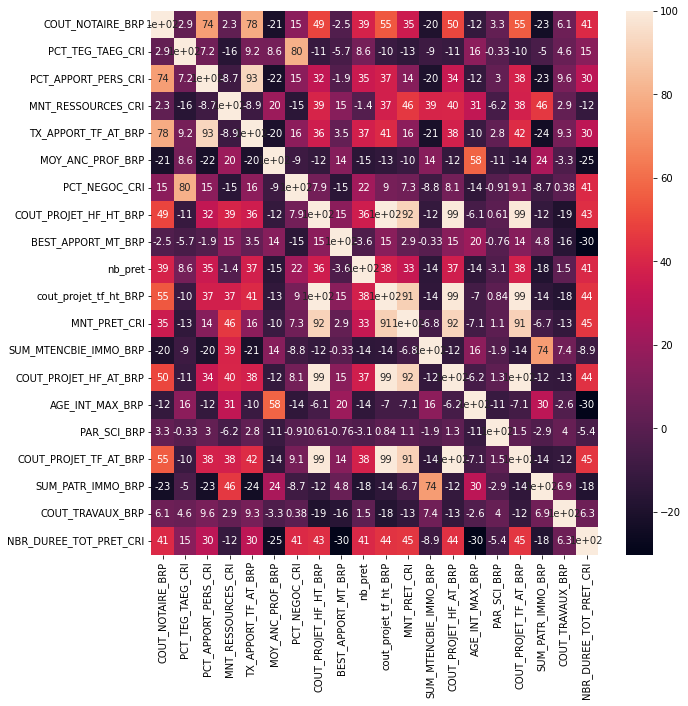

In [98]:
# heatmap apres suppressions des variables qui causent de la multi colinéarité 
plt.figure(figsize = (10,10))
sns.heatmap(X_train[var_quanti_selectionnees].corr(method = 'spearman')*100 , annot = True) 

Plusieurs variables semblent générer de la multicolinéarité, on va donc les supprimer:
- [A COMPLETER]

In [99]:
var_quanti_selectionnees= ['COUT_PROJET_HF_AT_BRP', 'quotite', 'MOY_ANC_PROF_BRP', 'AGE_INT_MAX_BRP', 'SUM_PATR_IMMO_BRP', 'IRPAR_USAGE_V12_MAX', 'nb_pret',
 'PAR_SCI_BRP', 'PRIX_LOYER', 'COUT_RACHAT_BRP', 'MNT_COUT_TOT_CREDIT_CRI', 'SUM_RESS_REVENUS_BRP',  
'BEST_APPORT_TX_BRP', 'MNT_TOT_ASSURANCE_CRI', 'PCT_TEG_TAEG_CRI', 'MNT_PRET_CRI', 'SUM_MTENCBIE_IMMO_BRP', 'COUT_NOTAIRE_BRP'] 

<AxesSubplot: >

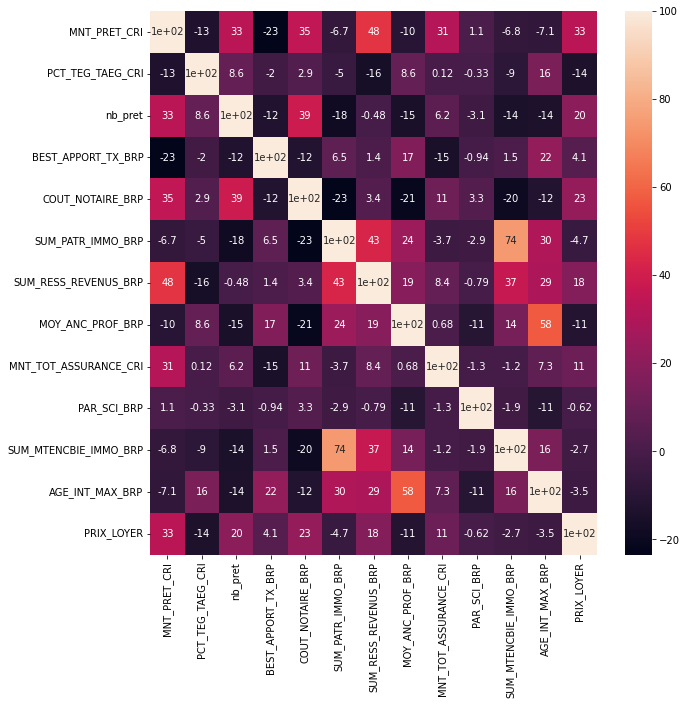

In [100]:
# heatmap apres suppressions des variables qui causent de la multi colinéarité 
plt.figure(figsize = (10,10))
sns.heatmap(X_train[var_quanti_selectionnees].corr(method = 'spearman')*100 , annot = True) 

#### Sur l'ensemble des variables:

In [101]:
var_selectionnees = selection_avec_lasso(X_train,y,20,'all')
print("Variables sélectionnées par Lasso:",var_selectionnees)

,coef
IRPAR_USAGE_V12_MAX_8.0,0.962331
IRPAR_USAGE_V12_MAX_1.0,0.644381
IRPAR_USAGE_V12_MAX_2.0,0.511289
IRPAR_USAGE_V12_MAX_7.0,0.486456
COD_ETA_BIEN_CRI_60,0.484817
IRPAR_USAGE_V12_MAX_3.0,0.438143
COD_SITU_LOGT_CRI_20.0,0.434555
PCT_APPORT_PERS_CRI,0.410010
IND_PRIMO_ACCEDT_CRI_1.0,0.403147
CODTYP_CRT_TRAVAIL_CRI_4,0.391232


Variables sélectionnées par Lasso: ['IRPAR_USAGE_V12_MAX_8.0', 'IRPAR_USAGE_V12_MAX_1.0', 'IRPAR_USAGE_V12_MAX_2.0', 'IRPAR_USAGE_V12_MAX_7.0', 'COD_ETA_BIEN_CRI_60', 'IRPAR_USAGE_V12_MAX_3.0', 'COD_SITU_LOGT_CRI_20.0', 'PCT_APPORT_PERS_CRI', 'IND_PRIMO_ACCEDT_CRI_1.0', 'CODTYP_CRT_TRAVAIL_CRI_4', 'PCT_TEG_TAEG_CRI', 'COD_SITU_LOGT_CRI_10.0', 'TOP_PRET_RELAIS_BRP_1', 'COUT_NOTAIRE_BRP', 'QUA_INT_MAX_BRP_4', 'COD_CSP_BRP_5500.0', 'IRPAR_USAGE_V12_MAX_6.0', 'COD_SITU_LOGT_CRI_50.0', 'IRPRO_USAGE_V12_MAX_nan', 'CODTYP_CRT_TRAVAIL_CRI_Z']


## Discrétisation  + regroupement de modalités 
Dans cette partie, on se charge de:
-  discrétiser les variables quantitatives en modalités 
-  réduire le nombre de modalités pour les variables qualitatives (trop de modalités ==> surapprentissage)

In [102]:
print("Les variables qualitatives sont:", X_train.select_dtypes(include="object").columns.tolist())
print("Les variables quantitatives sont:", X_train[var_quanti_selectionnees].columns.tolist())

Les variables qualitatives sont: ['TOP_CONNU_BRP', 'TOP_SCI_BRP', 'NBR_INT_BRP', 'NBR_TOT_COEMPR_CRI', 'CODTYPE_PROJET_CRI', 'COD_CPPOP_CRI', 'COD_ETA_BIEN_CRI', 'COD_USAGE_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'IRPAR_USAGE_V12_MAX', 'IRPRO_USAGE_V12_MAX', 'COD_CSP_BRP', 'STA_CLP_BRP', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'ROL_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_SIT_FAM_EMPRUNTEUR_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'NBR_ENF_ACHARGE_CRI', 'NBR_OCCUP_CRI', 'TOP_BIEN_FR_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP', 'top_locatif', 'top_pret_int_ext', 'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule']
Les variables quantitatives sont: ['MNT_PRET_CRI', 'PCT_TEG_TAEG_CRI', 'nb_pret', 'BEST_APPORT_TX_BRP', 'COUT_NOTAIRE_BRP', 'SUM_PATR_IMMO_BRP', 'SUM_RESS_REVENUS_BRP', 'MOY_ANC_PROF_BRP', 'MNT_TOT_ASSURANCE_CRI', 'PAR_SCI_BRP', 'SUM_MT

### Regroupement des modalités pour les variables catégorielles


#### Nécessaire de regrouper des modalités?
Sans exception, toutes les variables qualitatives sont catégorielles. On va regarder le nombre de modalités pour chacune d'entre elles


Certaines variables ont trop (surapprentissage) ou pas assez de modalités (nombre de modalités =1 => aucune discrimination):
- On ne traite pas la CSP avec bcp de modalités (l'autre variable CSP disponible est plus pertinente et a le bon nombre de modalité)
- la variable STA qui n'a pas de modalités interprétables
- ROL_INT_MAX n'a pas plus d'une modalité


In [103]:
drop_columns(X_train,["COD_CSP_BRP","STA_CLP_BRP","ROL_INT_MAX_BRP","TOP_CONNU_BRP","IRPRO_USAGE_V12_MAX"])

Ces colonnes vont être retirées: ['COD_CSP_BRP', 'STA_CLP_BRP', 'ROL_INT_MAX_BRP', 'TOP_CONNU_BRP', 'IRPRO_USAGE_V12_MAX']


,nb_pret,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,...,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule,TAUX_HLM,TAUX_CHOMAGE,PRIX_LOYER
3164,1,0,2,1,20,10,60,10,3360.0,0.95,...,350000.0,0.990491,0,0,0,0,0,10.12,9.02,6.58
26518,1,0,2,1,20,70,60,10,21367.0,10.27,...,186633.0,1.012110,0,0,0,0,1,9.69,9.02,6.59
11339,1,0,2,1,20,70,50,10,18090.0,7.70,...,216910.0,1.050854,0,0,0,0,0,7.56,9.02,5.53
67593,1,0,1,0,20,130,60,10,168202.0,67.28,...,81798.0,1.029255,0,0,0,0,1,8.91,9.02,6.72
40361,1,0,1,0,10,10,60,10,68300.0,23.69,...,220000.0,0.763094,0,0,0,0,1,12.47,9.02,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,1,0,2,1,20,70,60,10,11459.0,6.70,...,159541.0,1.046644,0,0,0,0,0,6.28,9.02,5.26
53184,1,0,1,0,10,70,60,10,124515.0,64.19,...,69473.0,1.036106,0,0,0,0,1,12.65,9.02,6.94
39125,1,0,2,1,20,130,50,10,106804.0,54.08,...,90689.0,1.031248,0,0,0,0,0,4.55,10.06,5.87
77287,1,0,1,0,10,130,40,40,81644.0,51.03,...,78356.0,1.023191,1,0,0,0,0,14.08,9.02,6.78


#### Regroupement des modalités

 Avant regroupement: On regarde si certaines sont déja non significatives. Si jamais on vient à toucher aux modalités, c'est important de vérifier que ce n'est pas l'encodage qui a fait ça


In [104]:
print("Les variables qualitatives sont:", X_train.select_dtypes(include="object").columns.tolist())

Les variables qualitatives sont: ['TOP_SCI_BRP', 'NBR_INT_BRP', 'NBR_TOT_COEMPR_CRI', 'CODTYPE_PROJET_CRI', 'COD_CPPOP_CRI', 'COD_ETA_BIEN_CRI', 'COD_USAGE_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'IRPAR_USAGE_V12_MAX', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_SIT_FAM_EMPRUNTEUR_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'NBR_ENF_ACHARGE_CRI', 'NBR_OCCUP_CRI', 'TOP_BIEN_FR_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP', 'top_locatif', 'top_pret_int_ext', 'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule']


In [105]:
list_quali_var=X_train.select_dtypes(include="object").columns.tolist()

##### Regroupement des modalités manuellement
- On récupère la liste des variables ayant plus de 5 modalités: il s'agit d'un seuil arbitraire, qui selon nous, semble pertinent. En effet, lorsqu'il y a trop de modalités, qui ont, qui plus est, peu d'observations, il convient de les regrouper pour éviter du surapprentissage

La priorité est de traiter les variables ayant trop de modalités (>8). D'une part on va renommer les catégories et effectuer un rassemblement de certaines modalités à la main. Dans un second temps, on va procéder à une sélection automatique. A la fin, on aura l'ensemble des variables catégorielles qui ont encore plus d'une modalité. 

In [106]:
replace_encoding_by_real_mod(X_train)


,nb_pret,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,...,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule,TAUX_HLM,TAUX_CHOMAGE,PRIX_LOYER
3164,1,0,2,1,maison individuelle,10,ancien_sup_10_ans,residence principale,3360.0,0.95,...,350000.0,0.990491,0,0,0,0,0,10.12,9.02,6.58
26518,1,0,2,1,maison individuelle,70,ancien_sup_10_ans,residence principale,21367.0,10.27,...,186633.0,1.012110,0,0,0,0,1,9.69,9.02,6.59
11339,1,0,2,1,maison individuelle,70,ancien_sup_10_ans,residence principale,18090.0,7.70,...,216910.0,1.050854,0,0,0,0,0,7.56,9.02,5.53
67593,1,0,1,0,maison individuelle,130,ancien_sup_10_ans,residence principale,168202.0,67.28,...,81798.0,1.029255,0,0,0,0,1,8.91,9.02,6.72
40361,1,0,1,0,appartement,10,ancien_sup_10_ans,residence principale,68300.0,23.69,...,220000.0,0.763094,0,0,0,0,1,12.47,9.02,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,1,0,2,1,maison individuelle,70,ancien_sup_10_ans,residence principale,11459.0,6.70,...,159541.0,1.046644,0,0,0,0,0,6.28,9.02,5.26
53184,1,0,1,0,appartement,70,ancien_sup_10_ans,residence principale,124515.0,64.19,...,69473.0,1.036106,0,0,0,0,1,12.65,9.02,6.94
39125,1,0,2,1,maison individuelle,130,ancien_sup_10_ans,residence principale,106804.0,54.08,...,90689.0,1.031248,0,0,0,0,0,4.55,10.06,5.87
77287,1,0,1,0,appartement,130,ancien_inf_10_ans,locatif principal,81644.0,51.03,...,78356.0,1.023191,1,0,0,0,0,14.08,9.02,6.78


In [107]:
imputation_for_na(X_train)

IMPUTATION PAR MODE OU MEDIANE
OK


,nb_pret,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,...,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule,TAUX_HLM,TAUX_CHOMAGE,PRIX_LOYER
3164,1,0,2,1,maison individuelle,10,ancien_sup_10_ans,residence principale,3360.0,0.95,...,350000.0,0.990491,0,0,0,0,0,10.12,9.02,6.58
26518,1,0,2,1,maison individuelle,70,ancien_sup_10_ans,residence principale,21367.0,10.27,...,186633.0,1.012110,0,0,0,0,1,9.69,9.02,6.59
11339,1,0,2,1,maison individuelle,70,ancien_sup_10_ans,residence principale,18090.0,7.70,...,216910.0,1.050854,0,0,0,0,0,7.56,9.02,5.53
67593,1,0,1,0,maison individuelle,130,ancien_sup_10_ans,residence principale,168202.0,67.28,...,81798.0,1.029255,0,0,0,0,1,8.91,9.02,6.72
40361,1,0,1,0,appartement,10,ancien_sup_10_ans,residence principale,68300.0,23.69,...,220000.0,0.763094,0,0,0,0,1,12.47,9.02,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,1,0,2,1,maison individuelle,70,ancien_sup_10_ans,residence principale,11459.0,6.70,...,159541.0,1.046644,0,0,0,0,0,6.28,9.02,5.26
53184,1,0,1,0,appartement,70,ancien_sup_10_ans,residence principale,124515.0,64.19,...,69473.0,1.036106,0,0,0,0,1,12.65,9.02,6.94
39125,1,0,2,1,maison individuelle,130,ancien_sup_10_ans,residence principale,106804.0,54.08,...,90689.0,1.031248,0,0,0,0,0,4.55,10.06,5.87
77287,1,0,1,0,appartement,130,ancien_inf_10_ans,locatif principal,81644.0,51.03,...,78356.0,1.023191,1,0,0,0,0,14.08,9.02,6.78


#### Regroupement des modalités automatiquement
- On a crée un algorithme qui permet de rassembler les modalités si elles ne sont pas assez remplies ou ne sont pas significatives.
- Deux objectifs: diminuer nombre de modalités et vérifier leur pertinence
- Si une modalités comporte moins de 5% ==> on doit la merge avec une autre modalité = on tente par modalité ayant la moyenne la plus proche
- Si la variable la plus proche n'est pas plus importante, alors on prend la classe majoritaire

In [108]:
import optbinning
from sklearn.preprocessing import LabelEncoder

dict_encoding=group_modalities_with_optbinning(X_train,y,None,0.05,0.001,True,False)

################################ TOP_SCI_BRP ################################
STATUS : OPTIMAL
['0']    67645
['1']      571
dtype: int64
ENCODING...
################################ NBR_INT_BRP ################################
STATUS : OPTIMAL
['1' '2']            67532
['3' '4' '5' '6']      684
dtype: int64
ENCODING...
################################ NBR_TOT_COEMPR_CRI ################################
STATUS : OPTIMAL
['0' '1']        68141
['2' '3' '4']       75
dtype: int64
ENCODING...
################################ CODTYPE_PROJET_CRI ################################
STATUS : OPTIMAL
['maison individuelle']                                                                                                                                           35149
['appartement']                                                                                                                                                   32485
['garage, box, parking' 'local mixte' 'sci/scpi' 'local professio

In [109]:
encoding_col_and_cat(X_train,dict_encoding,list_quali_var)


In [110]:
quali_too_low_mod,quali_no_discriminant,quali_good=select_quali_variables(X_train[list_quali_var],y,0.001)

In [111]:
drop_columns(X_train,quali_too_low_mod)

Ces colonnes vont être retirées: ['top_pers_seule']


,nb_pret,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,...,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,TAUX_HLM,TAUX_CHOMAGE,PRIX_LOYER
3164,1,0,0,0,2,0,2,1,3360.0,0.95,...,4.348690,350000.0,0.990491,0,0,0,0,10.12,9.02,6.58
26518,1,0,0,0,2,1,2,1,21367.0,10.27,...,4.518521,186633.0,1.012110,0,0,0,0,9.69,9.02,6.59
11339,1,0,0,0,2,1,2,1,18090.0,7.70,...,3.712432,216910.0,1.050854,0,0,0,0,7.56,9.02,5.53
67593,1,0,0,0,2,1,2,1,168202.0,67.28,...,1.548325,81798.0,1.029255,0,0,0,0,8.91,9.02,6.72
40361,1,0,0,0,0,0,2,1,68300.0,23.69,...,3.302014,220000.0,0.763094,0,0,0,0,12.47,9.02,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,1,0,0,0,2,1,2,1,11459.0,6.70,...,3.145897,159541.0,1.046644,0,0,0,0,6.28,9.02,5.26
53184,1,0,0,0,0,1,2,1,124515.0,64.19,...,2.602667,69473.0,1.036106,0,0,0,0,12.65,9.02,6.94
39125,1,0,0,0,2,1,2,1,106804.0,54.08,...,3.772421,90689.0,1.031248,0,0,0,0,4.55,10.06,5.87
77287,1,0,0,0,0,1,1,0,81644.0,51.03,...,2.768274,78356.0,1.023191,1,0,0,0,14.08,9.02,6.78


In [112]:
drop_columns(X_train,quali_no_discriminant)

Ces colonnes vont être retirées: ['NBR_INT_BRP', 'COD_ETA_BIEN_CRI', 'QUA_INT_MAX_BRP', 'top_autre_pret_int', 'top_autre_pret_ext']


,nb_pret,TOP_SCI_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,PCT_APPORT_PERS_CRI,PCT_ENDETTMT_CRI,...,TOP_NAT_FR_CRI,CSP_RGP_BRP,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,TAUX_HLM,TAUX_CHOMAGE,PRIX_LOYER
3164,1,0,0,2,0,1,3360.0,0.95,9,37.21656,...,1,2,4.348690,350000.0,0.990491,0,0,10.12,9.02,6.58
26518,1,0,0,2,1,1,21367.0,10.27,1,37.22759,...,1,2,4.518521,186633.0,1.012110,0,0,9.69,9.02,6.59
11339,1,0,0,2,1,1,18090.0,7.70,0,24.67364,...,1,2,3.712432,216910.0,1.050854,0,0,7.56,9.02,5.53
67593,1,0,0,2,1,1,168202.0,67.28,0,41.84846,...,1,2,1.548325,81798.0,1.029255,0,0,8.91,9.02,6.72
40361,1,0,0,0,0,1,68300.0,23.69,26,40.63613,...,1,2,3.302014,220000.0,0.763094,0,0,12.47,9.02,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,1,0,0,2,1,1,11459.0,6.70,0,40.30916,...,1,1,3.145897,159541.0,1.046644,0,0,6.28,9.02,5.26
53184,1,0,0,0,1,1,124515.0,64.19,0,38.67182,...,1,2,2.602667,69473.0,1.036106,0,0,12.65,9.02,6.94
39125,1,0,0,2,1,1,106804.0,54.08,0,29.03523,...,1,2,3.772421,90689.0,1.031248,0,0,4.55,10.06,5.87
77287,1,0,0,0,1,0,81644.0,51.03,0,23.08708,...,1,2,2.768274,78356.0,1.023191,1,0,14.08,9.02,6.78


#### Conclusion

### Discrétisation des variables quantitatives


In [113]:
discretisation_variables_from_chi2(X_train)


,nb_pret,TOP_SCI_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,PCT_APPORT_PERS_CRI,PCT_ENDETTMT_CRI,...,g_quotite,g_PCT_TEG_TAEG_CRI,g_COUT_NOTAIRE_BRP,g_MOY_ANC_PROF_BRP,g_nb_pret,g_MNT_COUT_TOT_CREDIT_CRI,g_BEST_APPORT_TX_BRP,g_SUM_MTENCBIE_IMMO_BRP,g_MNT_PRET_CRI,g_AGE_INT_MAX_BRP
3164,1,0,0,2,0,1,3360.0,0.95,9,37.21656,...,grp_4,grp_4,grp_2,grp_1,grp_2,grp_3,grp_4,grp_3,grp_3,grp_1
26518,1,0,0,2,1,1,21367.0,10.27,1,37.22759,...,grp_2,grp_3,grp_1,grp_3,grp_2,grp_2,grp_2,grp_3,grp_2,grp_1
11339,1,0,0,2,1,1,18090.0,7.70,0,24.67364,...,grp_3,grp_3,grp_1,grp_3,grp_2,grp_3,grp_2,grp_3,grp_2,grp_1
67593,1,0,0,2,1,1,168202.0,67.28,0,41.84846,...,grp_1,grp_2,grp_1,grp_2,grp_2,grp_1,grp_1,grp_1,grp_1,grp_2
40361,1,0,0,0,0,1,68300.0,23.69,26,40.63613,...,grp_1,grp_2,grp_1,grp_1,grp_2,grp_2,grp_2,grp_3,grp_2,grp_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,1,0,0,2,1,1,11459.0,6.70,0,40.30916,...,grp_3,grp_4,grp_1,grp_1,grp_2,grp_2,grp_3,grp_3,grp_2,grp_1
53184,1,0,0,0,1,1,124515.0,64.19,0,38.67182,...,grp_1,grp_3,grp_1,grp_2,grp_2,grp_1,grp_1,grp_3,grp_2,grp_1
39125,1,0,0,2,1,1,106804.0,54.08,0,29.03523,...,grp_1,grp_3,grp_1,grp_1,grp_2,grp_1,grp_1,grp_3,grp_1,grp_2
77287,1,0,0,0,1,0,81644.0,51.03,0,23.08708,...,grp_1,grp_1,grp_1,grp_2,grp_2,grp_1,grp_1,grp_3,grp_2,grp_1


Vérification que la discrétisation est pertinente avec : 
- un groupby par moyenne de défaut pour chaque variable 
- un test du khi2 

In [114]:
verification_par_moyenne_defaut(X_train,y)

------ pour la variable g_MNT_TOT_ASSURANCE_CRI : 

g_MNT_TOT_ASSURANCE_CRI
grp_1    0.004715
grp_2    0.007000
grp_3    0.013973
Name: defaut_36mois, dtype: float64

------ pour la variable g_COUT_RACHAT_BRP : 

g_COUT_RACHAT_BRP
grp_1    0.003433
grp_2    0.004374
grp_3    0.009203
Name: defaut_36mois, dtype: float64

------ pour la variable g_SUM_RESS_REVENUS_BRP : 

g_SUM_RESS_REVENUS_BRP
grp_1    0.005742
grp_2    0.006368
grp_3    0.006958
Name: defaut_36mois, dtype: float64

------ pour la variable g_SUM_PATR_IMMO_BRP : 

g_SUM_PATR_IMMO_BRP
grp_1    0.005087
grp_2    0.006631
Name: defaut_36mois, dtype: float64

------ pour la variable g_quotite : 

g_quotite
grp_1    0.003961
grp_2    0.005876
grp_3    0.008058
grp_4    0.013665
Name: defaut_36mois, dtype: float64

------ pour la variable g_PCT_TEG_TAEG_CRI : 

g_PCT_TEG_TAEG_CRI
grp_1    0.002953
grp_2    0.005072
grp_3    0.005254
grp_4    0.011285
Name: defaut_36mois, dtype: float64

------ pour la variable g_COUT_NOTAIRE_B

Certaines variables ont trop (surapprentissage) ou pas assez de modalités (nombre de modalités =1 => aucune discrimination):
- On ne traite pas la CSP avec bcp de modalités (l'autre variable CSP disponible est plus pertinente et a le bon nombre de modalité)
- la variable STA qui n'a pas de modalités interprétables
- ROL_INT_MAX n'a pas plus d'une modalité


## Overview de la sélection de variables
- Quelles sont les variables finalement retenues?
- Etude de la stabilité temporelles
 

In [115]:

X_train_final=X_train.select_dtypes(include=['object'])
#

In [116]:
X_train_final

,TOP_SCI_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_USAGE_BIEN_CRI,TOP_ETR_BRP,TOP_PRET_RELAIS_BRP,TOP_SURFINANCEMENT_BRP,top_exist_conso_revo_BRP,IRPAR_USAGE_V12_MAX,...,COD_TYPE_MARCHE_CRI,IND_INCIDENT_BDF_CRI,IND_PRIMO_ACCEDT_CRI,NBR_ENF_ACHARGE_CRI,NBR_OCCUP_CRI,TOP_BIEN_FR_CRI,TOP_NAT_FR_CRI,CSP_RGP_BRP,top_locatif,top_pret_int_ext
3164,0,0,2,0,1,0,0,0,1,2,...,0,0,1,0,1,1,1,2,0,0
26518,0,0,2,1,1,0,0,0,1,0,...,0,0,1,0,1,1,1,2,0,0
11339,0,0,2,1,1,0,0,0,0,0,...,0,0,1,0,0,1,1,2,0,0
67593,0,0,2,1,1,0,0,0,1,0,...,0,0,1,0,1,1,1,2,0,0
40361,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,0,0,2,1,1,0,0,0,1,1,...,0,0,1,0,1,1,1,1,0,0
53184,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,1,2,0,0
39125,0,0,2,1,1,0,0,0,0,0,...,0,0,1,0,1,1,1,2,0,0
77287,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,1,2,1,0


[STABILITE TEMPORELLE]

In [117]:
#from scripts.stability_pipeline import pipeline, intervalles_annee , intervalles_semestre, stability_according_to_the_target, stability_by_repartition_of_modalities, stability_by_repartition_of_defaults
#on applique le même preprocessing et la même discrétisation qu'on a fait pour le X_train
stability_data = raw_data.copy() # deep copy is created
processing_pipeline(stability_data,richesse_data,chomage_data,inondation_data)

Ces colonnes vont être retirées: ['FINANCEMENT_PR_BRP', 'IRPRO_USAGE_V12_MAX', 'SUM_MNT_PRE_INTERNE_BRP', 'TX_APPORT_AGENCE_BRP', 'TX_FINANCEMENT_AGENCE_BRP', 'TX_APPORT_BRP', 'TX_FINANCEMENT_BRP', 'mnt_pret_ext_brp', 'SUM_LOYER_BRP', 'SUM_AUTRES_CHARG_BRP']
Ces colonnes vont être retirées: ['NAT_BIEN_FIN_BRP', 'ASU_BIEN_FIN_BRP', 'TYP_CNT_TRA_MAX_BRP', 'SIT_FAM_INT_BRP', 'TYP_LOG_ACT_BRP']
IMPUTATION PAR 0
OK
Ces colonnes vont être retirées: ['rentabilite_loc', 'Epargne_nb_ans_rev_prof']
IMPUTATION PAR MODE OU MEDIANE
OK
Ces colonnes vont être retirées: ['region_cri', 'COD_POSTAL_BIEN_CRI', 'DEPARTEMENT_CRI', 'NAT_INT_MAX_BRP', 'CODPAY_NAT_EMPRUNTEUR_CRI', 'CODPAY_BIEN_CRI']
Ces colonnes vont être retirées: ['COD_CSP_BRP', 'STA_CLP_BRP', 'ROL_INT_MAX_BRP', 'TOP_CONNU_BRP']
<_io.TextIOWrapper name='doc/encoding_categorical_variables.json' mode='r' encoding='UTF-8'>


,date_debloc_avec_crd,nb_pret,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,...,g_quotite,g_PCT_TEG_TAEG_CRI,g_COUT_NOTAIRE_BRP,g_MOY_ANC_PROF_BRP,g_nb_pret,g_MNT_COUT_TOT_CREDIT_CRI,g_BEST_APPORT_TX_BRP,g_SUM_MTENCBIE_IMMO_BRP,g_MNT_PRET_CRI,g_AGE_INT_MAX_BRP
0,2014-05-01,1,0,0,0,0,20,0,0,28234.44,...,grp_3,grp_4,grp_2,grp_1,grp_2,grp_1,grp_3,grp_3,grp_2,grp_1
1,2014-05-01,2,0,0,0,0,10,0,1,424038.00,...,grp_1,grp_4,grp_3,grp_1,grp_1,grp_1,grp_1,grp_3,grp_2,grp_2
2,2014-07-01,1,0,0,0,2,50,2,0,0.00,...,grp_4,grp_4,grp_1,grp_3,grp_2,grp_3,grp_4,grp_3,grp_1,grp_2
3,2014-04-01,1,0,0,0,2,10,0,2,53820.00,...,grp_1,grp_4,grp_2,grp_1,grp_2,grp_3,grp_2,grp_1,grp_2,grp_1
4,2014-04-01,3,0,0,0,0,10,0,1,91800.00,...,grp_1,grp_4,grp_2,grp_3,grp_1,grp_2,grp_1,grp_3,grp_2,grp_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114411,2018-04-01,1,0,0,0,2,10,2,1,530.00,...,grp_3,grp_2,grp_2,grp_2,grp_2,grp_2,grp_4,grp_3,grp_2,grp_2
114412,2018-04-01,2,0,0,0,0,10,2,1,0.00,...,grp_4,grp_2,grp_2,grp_3,grp_1,grp_2,grp_4,grp_3,grp_2,grp_2
114413,2018-04-01,1,0,0,0,0,10,2,1,28234.44,...,grp_2,grp_2,grp_2,grp_3,grp_2,grp_3,grp_3,grp_3,grp_3,grp_1
114414,2018-04-01,1,0,0,0,2,10,2,2,28234.44,...,grp_3,grp_3,grp_2,grp_1,grp_2,grp_2,grp_3,grp_3,grp_2,grp_2


In [118]:
#selection des varibles qu'on utilise au final pour la regression
###
print('ICI ON NE GARDE COMME VARIABLES EXPLICATIQUES, QUE LES VARIABLES DE TYPE OBJET (et aussi la target, et la date)')
###
stability_data=stability_data[list(stability_data.select_dtypes(include=["object","category"]))+['defaut_36mois', 'date_debloc_avec_crd']]    

ICI ON NE GARDE COMME VARIABLES EXPLICATIQUES, QUE LES VARIABLES DE TYPE OBJET (et aussi la target, et la date)


In [119]:
stability_data

,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,TOP_ETR_BRP,TOP_PRET_RELAIS_BRP,TOP_SURFINANCEMENT_BRP,...,g_COUT_NOTAIRE_BRP,g_MOY_ANC_PROF_BRP,g_nb_pret,g_MNT_COUT_TOT_CREDIT_CRI,g_BEST_APPORT_TX_BRP,g_SUM_MTENCBIE_IMMO_BRP,g_MNT_PRET_CRI,g_AGE_INT_MAX_BRP,defaut_36mois,date_debloc_avec_crd
0,0,0,0,0,20,0,0,0,0,1,...,grp_2,grp_1,grp_2,grp_1,grp_3,grp_3,grp_2,grp_1,0,2014-05-01
1,0,0,0,0,10,0,1,0,0,0,...,grp_3,grp_1,grp_1,grp_1,grp_1,grp_3,grp_2,grp_2,0,2014-05-01
2,0,0,0,2,50,2,0,0,0,0,...,grp_1,grp_3,grp_2,grp_3,grp_4,grp_3,grp_1,grp_2,0,2014-07-01
3,0,0,0,2,10,0,2,1,0,0,...,grp_2,grp_1,grp_2,grp_3,grp_2,grp_1,grp_2,grp_1,0,2014-04-01
4,0,0,0,0,10,0,1,0,0,0,...,grp_2,grp_3,grp_1,grp_2,grp_1,grp_3,grp_2,grp_1,0,2014-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114411,0,0,0,2,10,2,1,0,0,0,...,grp_2,grp_2,grp_2,grp_2,grp_4,grp_3,grp_2,grp_2,0,2018-04-01
114412,0,0,0,0,10,2,1,0,0,0,...,grp_2,grp_3,grp_1,grp_2,grp_4,grp_3,grp_2,grp_2,0,2018-04-01
114413,0,0,0,0,10,2,1,0,0,1,...,grp_2,grp_3,grp_2,grp_3,grp_3,grp_3,grp_3,grp_1,0,2018-04-01
114414,0,0,0,2,10,2,2,0,0,1,...,grp_2,grp_1,grp_2,grp_2,grp_3,grp_3,grp_2,grp_2,0,2018-04-01


In [120]:
#création d'une variable année à partir de la variable date_deblocage
intervalles_annee(stability_data)
intervalles_semestre(stability_data)

TOP_SCI_BRP


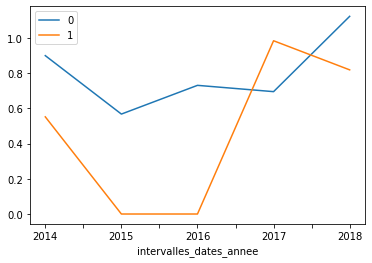

NBR_INT_BRP


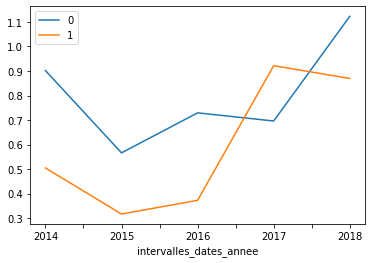

NBR_TOT_COEMPR_CRI


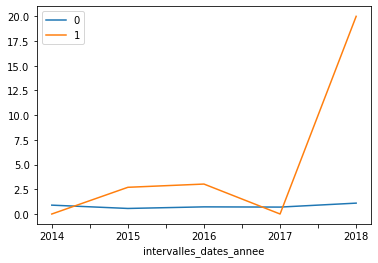

CODTYPE_PROJET_CRI


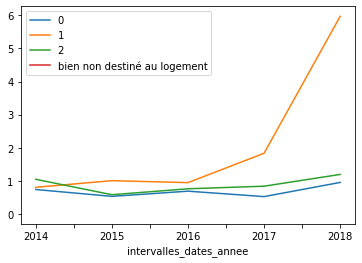

COD_CPPOP_CRI


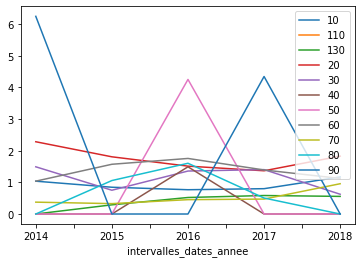

COD_ETA_BIEN_CRI


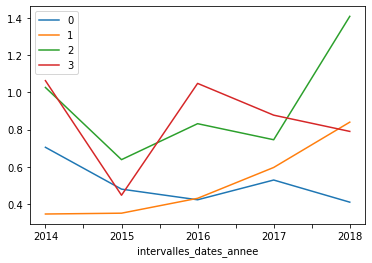

COD_USAGE_BIEN_CRI


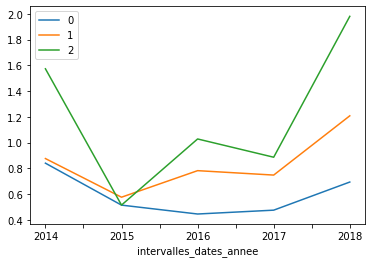

TOP_ETR_BRP


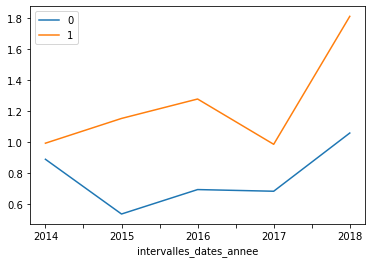

TOP_PRET_RELAIS_BRP


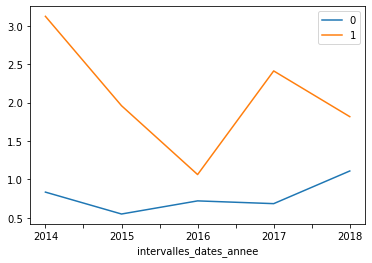

TOP_SURFINANCEMENT_BRP


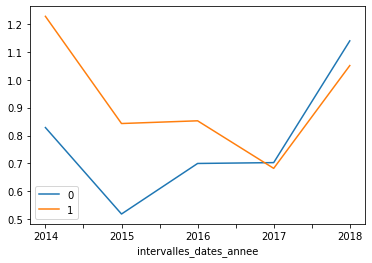

top_exist_conso_revo_BRP


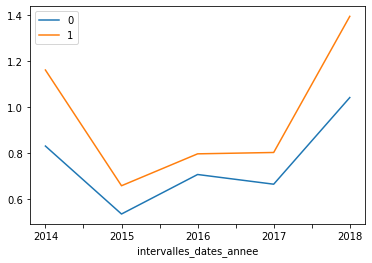

IRPAR_USAGE_V12_MAX


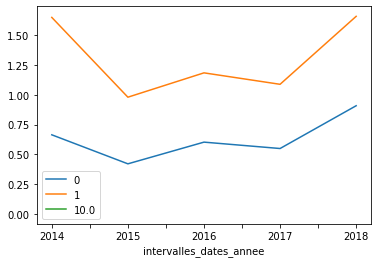

TOP_ASC_DESC_BRP


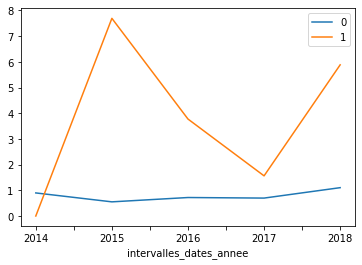

QUA_INT_1_BRP


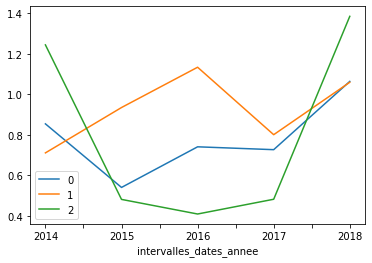

QUA_INT_MAX_BRP


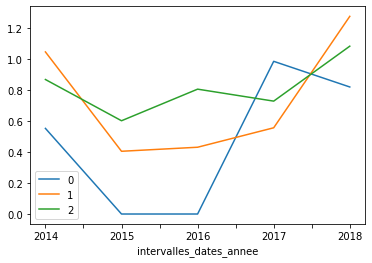

CODTYP_CRT_TRAVAIL_CRI


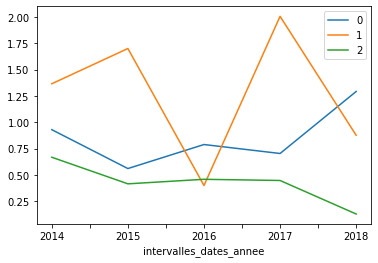

COD_SITU_LOGT_CRI


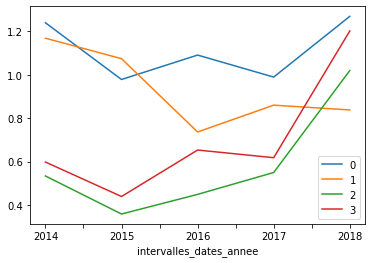

COD_SIT_FAM_EMPRUNTEUR_CRI


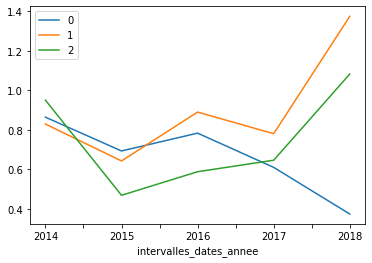

COD_TYPE_MARCHE_CRI


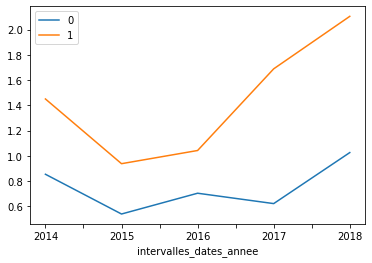

IND_INCIDENT_BDF_CRI


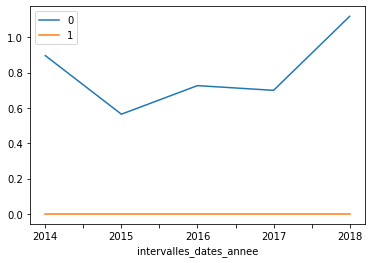

IND_PRIMO_ACCEDT_CRI


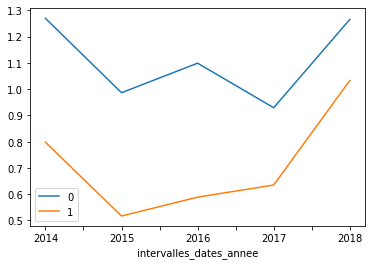

NBR_ENF_ACHARGE_CRI


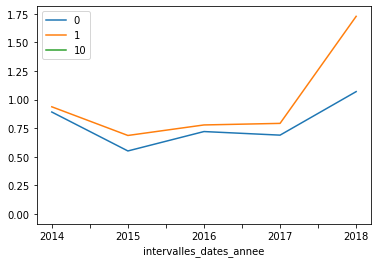

NBR_OCCUP_CRI


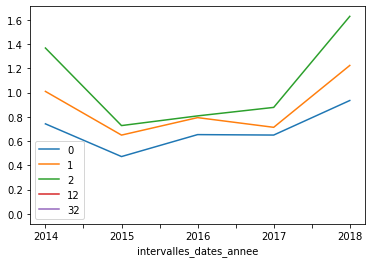

TOP_BIEN_FR_CRI


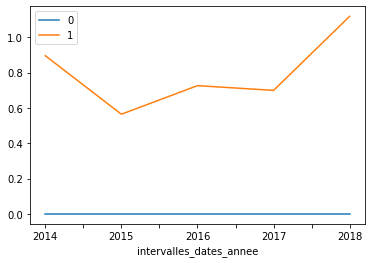

TOP_NAT_FR_CRI


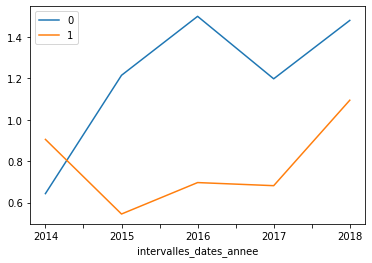

CSP_RGP_BRP


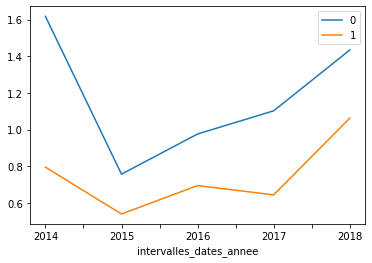

top_locatif


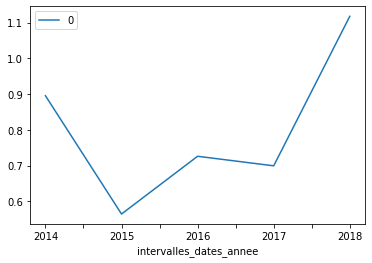

top_pret_int_ext


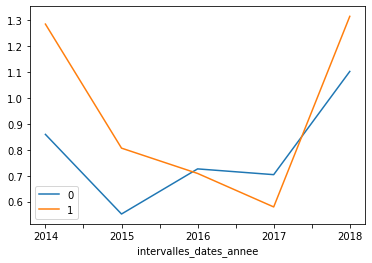

top_autre_pret_int


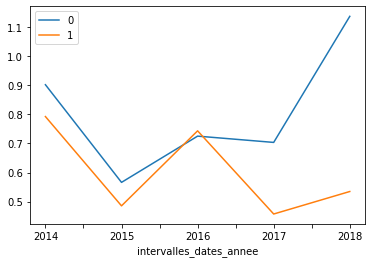

top_autre_pret_ext


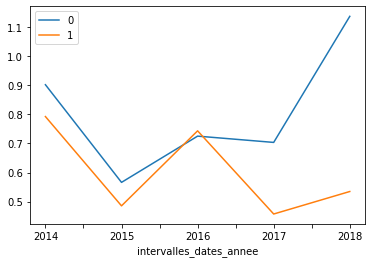

top_pers_seule


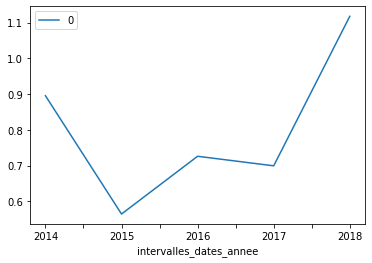

g_MNT_TOT_ASSURANCE_CRI


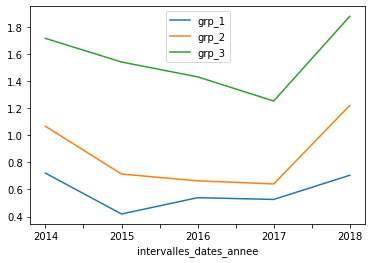

g_COUT_RACHAT_BRP


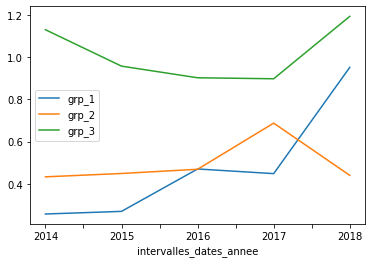

g_SUM_RESS_REVENUS_BRP


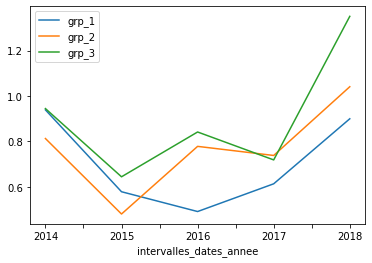

g_SUM_PATR_IMMO_BRP


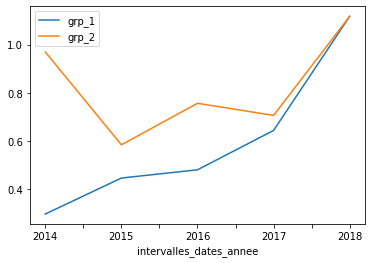

g_quotite


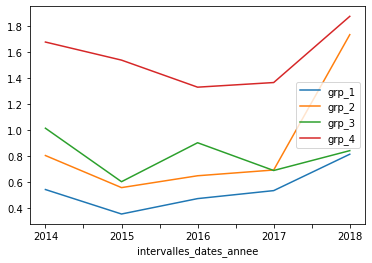

g_PCT_TEG_TAEG_CRI


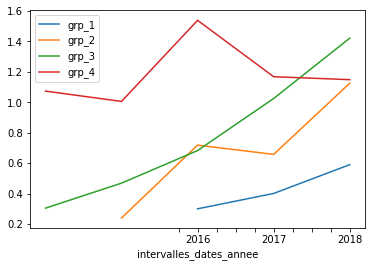

g_COUT_NOTAIRE_BRP


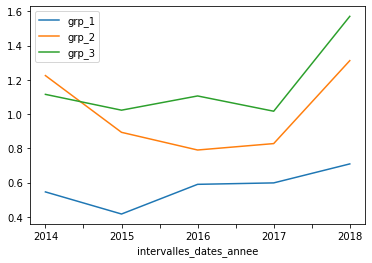

g_MOY_ANC_PROF_BRP


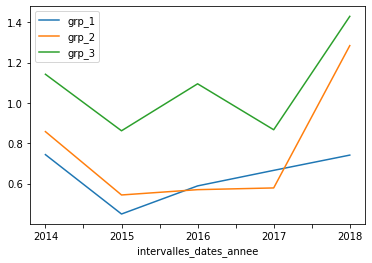

g_nb_pret


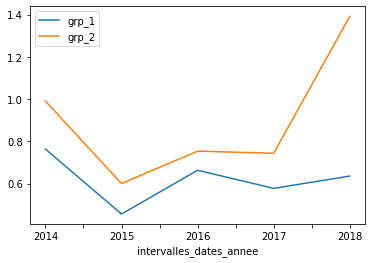

g_MNT_COUT_TOT_CREDIT_CRI


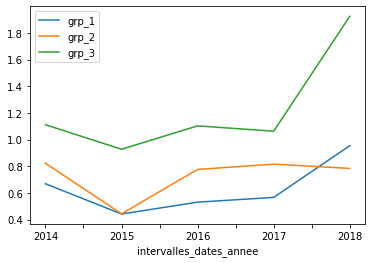

g_BEST_APPORT_TX_BRP


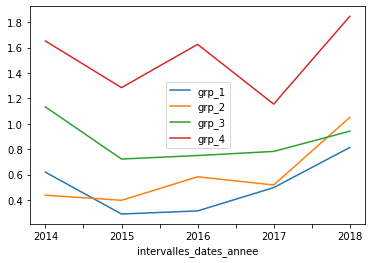

g_SUM_MTENCBIE_IMMO_BRP


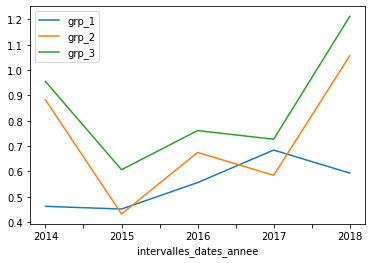

g_MNT_PRET_CRI


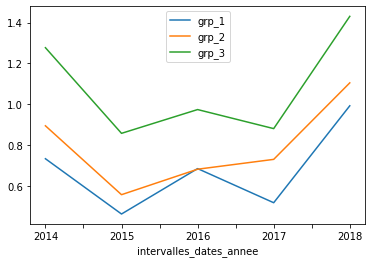

g_AGE_INT_MAX_BRP


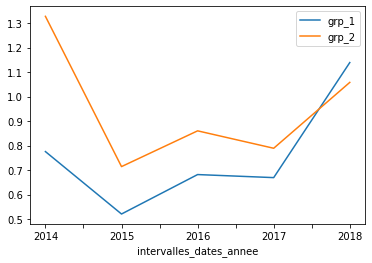

In [121]:
stability_according_to_the_target(stability_data.drop(['date_debloc_avec_crd'], axis=1), 'intervalles_dates_annee', 'intervalles_dates_semestre')

In [122]:
#stability_by_repartition_of_defaults(stability_data.drop(['date_debloc_avec_crd'], axis=1), 'intervalles_dates_semestre', 'intervalles_dates_annee')

In [123]:
#stability_by_repartition_of_modalities(stability_data.drop(['date_debloc_avec_crd'], axis=1), 'intervalles_dates_semestre', 'intervalles_dates_annee')